In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from plotnine import *

In [2]:
plt.rc('font',family='Malgun Gothic')

In [3]:
case = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Case.csv")
timeage = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeAge.csv")
patient_route = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientRoute.csv")
patient_info = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientInfo.csv")

In [4]:
# infection_case : 집단감염 된 장소
# confirmed : 누적확진자 수
# group - True : 집단감염 됨

case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         81 non-null     int64 
 1   province        81 non-null     object
 2   city            81 non-null     object
 3   group           81 non-null     bool  
 4   infection_case  81 non-null     object
 5   confirmed       81 non-null     int64 
 6   latitude        81 non-null     object
 7   longitude       81 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [5]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [6]:
case.shape

(81, 8)

In [7]:
# 결측치 확인
case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [8]:
# 집단감염이 발생한 Province가 어디어딘지 확인
case['province'].value_counts()

Gyeongsangbuk-do     9
Seoul                8
Gyeonggi-do          7
Gyeongsangnam-do     7
Busan                7
Incheon              5
Jeollanam-do         4
Daejeon              4
Gwangju              4
Sejong               4
Jeollabuk-do         4
Chungcheongbuk-do    4
Daegu                4
Chungcheongnam-do    3
Ulsan                3
Gangwon-do           3
Jeju-do              1
Name: province, dtype: int64

In [9]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         81 non-null     int64 
 1   province        81 non-null     object
 2   city            81 non-null     object
 3   group           81 non-null     bool  
 4   infection_case  81 non-null     object
 5   confirmed       81 non-null     int64 
 6   latitude        81 non-null     object
 7   longitude       81 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [10]:
# 위도, 경도 칼럼이 알 수 없는 데이터 따로 빼기
no_map = case.loc[(case['latitude'] == "-") | (case['longitude'] == "-")]
no_map.shape

(52, 8)

In [11]:
group_location = case.loc[(case['latitude'] != "-") | (case['longitude'] != "-")]
group_location.shape

(29, 8)

In [12]:
group_location['latitude'] = group_location['latitude'].astype(float)
group_location['longitude'] = group_location['longitude'].astype(float)

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
group_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 77
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_id         29 non-null     int64  
 1   province        29 non-null     object 
 2   city            29 non-null     object 
 3   group           29 non-null     bool   
 4   infection_case  29 non-null     object 
 5   confirmed       29 non-null     int64  
 6   latitude        29 non-null     float64
 7   longitude       29 non-null     float64
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 1.8+ KB


In [ ]:
# province별로 집단감염이 얼마나 발생했는지 folium을 이용해 표시
'''
geo_df = group_location

map = folium.Map(location=[geo_df['latitude'].mean(), geo_df['longitude']], zoom_start=5)

for n in geo_df.index:
    do_name = geo_df.loc[n, 'province']+"-"+geo_df.loc[n, 'city']
    
    folium.Marker(location=[geo_df.loc[n, 'latitude'], geo_df.loc[n, 'longitude']],
                 popup=do_name).add_to(map)
map
'''
# error : TypeError: cannot convert the series to <class 'float'>

In [14]:
# province 별로 확진자 누적 숫자를 그래프로 나타내보자

case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [15]:
g = case.groupby(['province'])['confirmed'].max().sort_values(ascending=False)

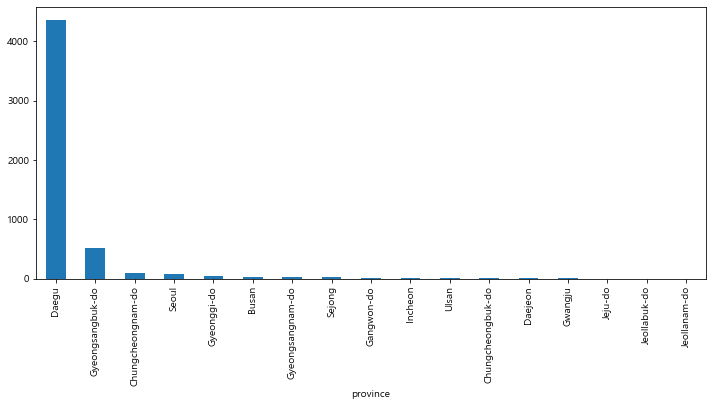

In [16]:
plt.figure(figsize=(12,5))
g.plot.bar()

In [17]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2112 non-null   int64  
 1   global_num          1160 non-null   object 
 2   sex                 1821 non-null   object 
 3   birth_year          1557 non-null   float64
 4   age                 1815 non-null   object 
 5   country             2112 non-null   object 
 6   province            2112 non-null   object 
 7   city                1944 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      953 non-null    object 
 10  infection_order     31 non-null     float64
 11  infected_by         374 non-null    object 
 12  contact_number      381 non-null    float64
 13  symptom_onset_date  145 non-null    object 
 14  confirmed_date      1843 non-null   object 
 15  released_date       193 non-null    object 
 16  deceas

In [18]:
patient_info.isnull().sum()

patient_id               0
global_num             952
sex                    291
birth_year             555
age                    297
country                  0
province                 0
city                   168
disease               2093
infection_case        1159
infection_order       2081
infected_by           1738
contact_number        1731
symptom_onset_date    1967
confirmed_date         269
released_date         1919
deceased_date         2083
state                    0
dtype: int64

In [19]:
patient_info.shape

(2112, 18)

In [20]:
patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [21]:
# 성별에 따른 코로나바이러스 확진자 수 현황
gender = pd.DataFrame(patient_info.groupby(['sex'])['patient_id'].count())
gender = gender.reset_index()

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


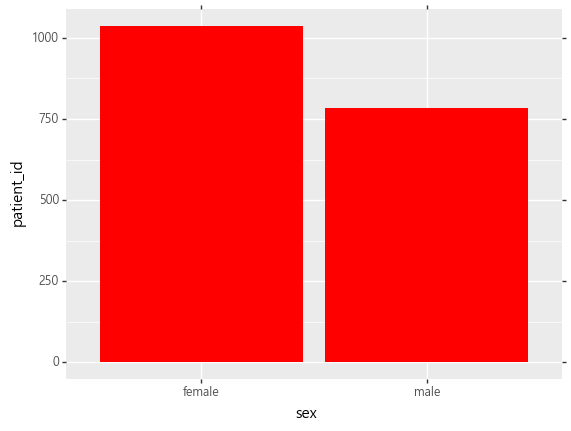

<ggplot: (-9223371860005738759)>

In [22]:
(ggplot(gender)
 +aes(x='sex', y='patient_id')
 +geom_bar(stat='identity', position='dodge', fill='red')
 +theme(text=element_text("Malgun Gothic"))
)
 

In [23]:
# 연령에 따라 확진자 분포율도 시각화해보자

In [24]:
# 우선 연령별 종류가 어떻게 되는지보자
patient_info['age'].value_counts()

20s     436
50s     362
40s     284
30s     233
60s     203
70s     103
80s      81
10s      70
0s       26
90s      16
100s      1
Name: age, dtype: int64

In [25]:
age_df = pd.DataFrame(patient_info.groupby(['age'])['patient_id'].count())
age_df = age_df.reset_index()
age_df

,age,patient_id
0,0s,26
1,100s,1
2,10s,70
3,20s,436
4,30s,233
5,40s,284
6,50s,362
7,60s,203
8,70s,103
9,80s,81


In [26]:
# age칼럼 value들 내림차순으로 정렬
age_df = age_df.sort_values(by=['age'])
# patient_id 칼럼을 patient_num 으로 바꿔주기
age_df.columns = ['age', 'patient_num']
age_df

,age,patient_num
0,0s,26
1,100s,1
2,10s,70
3,20s,436
4,30s,233
5,40s,284
6,50s,362
7,60s,203
8,70s,103
9,80s,81


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


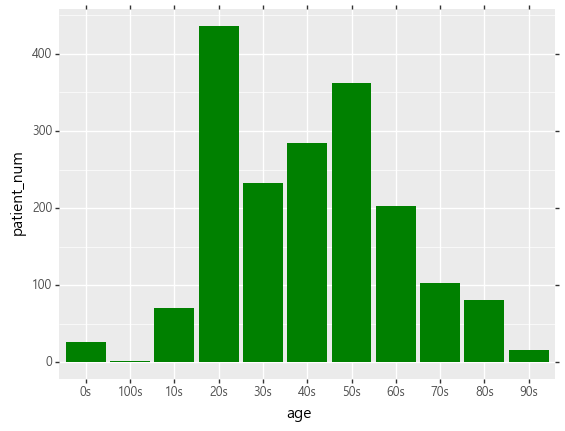

<ggplot: (-9223371860005544234)>

In [27]:
# ggplot을 이용해서 연령별 환자수 막대그래프로 그려보기
(ggplot(age_df)
 +aes(x='age', y='patient_num')
 +geom_bar(stat='identity',position='dodge', fill='green')
 +theme(text=element_text(family="Malgun Gothic"))
)

In [28]:
patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2.0,NaN,2020-01-31,2020-02-24,NaN,released


# 집단감염을 초래한 환자들 분석

In [33]:
# 접촉자 수를 중심으로 내림차순으로 정렬해보기

patient_info['contact_number'].isnull().sum()

1731

In [34]:
patient_info.shape

(2112, 18)

In [38]:
# 접촉자 수 nan 데이터 0 으로 채우기

patient_info['contact_number'] = patient_info['contact_number'].fillna(0)
patient_info['contact_number'].isnull().sum()

0

In [39]:
# 접촉자 수 value들을 int형으로 바꿔주기

patient_info['contact_number'] = patient_info['contact_number'].astype(int)

In [43]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2112 non-null   int64  
 1   global_num          1160 non-null   object 
 2   sex                 1821 non-null   object 
 3   birth_year          1557 non-null   float64
 4   age                 1815 non-null   object 
 5   country             2112 non-null   object 
 6   province            2112 non-null   object 
 7   city                1944 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      953 non-null    object 
 10  infection_order     31 non-null     float64
 11  infected_by         374 non-null    object 
 12  contact_number      2112 non-null   int32  
 13  symptom_onset_date  145 non-null    object 
 14  confirmed_date      1843 non-null   object 
 15  released_date       193 non-null    object 
 16  deceas

In [45]:
contact_num = patient_info.loc[patient_info['contact_number'] > 0]

In [46]:
contact_num.shape

(336, 18)

In [47]:
contact_num.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [60]:
# 지역(Province)별로 접촉자숫자의 평균값을 내보자

contact = pd.DataFrame(contact_num.groupby(['province'])['contact_number'].mean().round())
contact = contact.reset_index()
contact.columns = ['시도별', '접촉자수 평균']
contact

,시도별,접촉자수 평균
0,Busan,37.0
1,Chungcheongnam-do,17.0
2,Daegu,1160.0
3,Daejeon,16.0
4,Gangwon-do,14.0
5,Gwangju,76.0
6,Gyeonggi-do,90.0
7,Gyeongsangbuk-do,5.0
8,Jeju-do,66.0
9,Jeollabuk-do,113.0


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


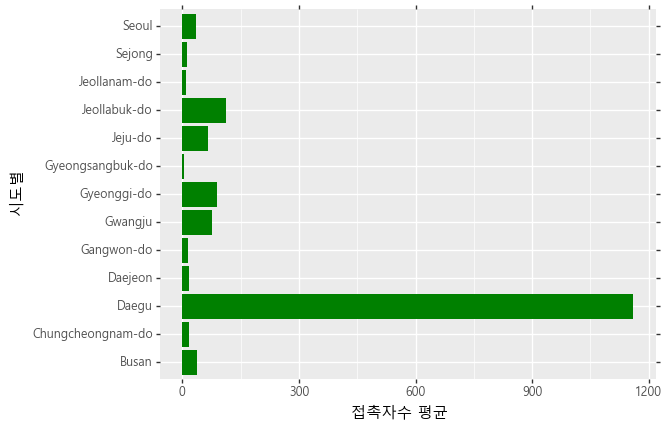

<ggplot: (-9223371860001565822)>

In [61]:
(ggplot(contact)
 +aes(x='시도별', y='접촉자수 평균')
 +geom_bar(stat='identity', position='dodge', fill='green')
 +theme(text=element_text(family="Malgun Gothic"))
 +coord_flip()
)

In [62]:
# 어떻게 감염 됬는지에 대한 경로에 대해 분석해보자.

patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [111]:
# 데이터 이름 길어서 data라는 데이터프레임으로 복사본 만들기
data = patient_info.copy()
data.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [112]:
# 감염 경로 결측치 값 보기
data['infection_case'].isnull().sum()

1159

In [113]:
data['infection_case'] = data['infection_case'].fillna("Unknown")
data['infection_case'].isnull().sum()

0

In [114]:
data['infection_case'].value_counts()

Unknown                             1159
contact with patient                 414
etc                                  203
Guro-gu Call Center                   99
Shincheonji Church                    62
overseas inflow                       42
Onchun Church                         32
gym facility in Cheonan               29
Cheongdo Daenam Hospital              21
Dongan Church                         16
Eunpyeong St. Mary's Hospital         14
Seongdong-gu APT                      13
gym facility in Sejong                 4
Suyeong-gu Kindergarten                3
Ministry of Oceans and Fisheries       1
Name: infection_case, dtype: int64

In [115]:
import seaborn as sns

In [116]:
infection = pd.DataFrame(data['infection_case'].value_counts())
infection = infection.reset_index()
infection.columns = ['감염 경로', '감염 수']
infection

,감염 경로,감염 수
0,Unknown,1159
1,contact with patient,414
2,etc,203
3,Guro-gu Call Center,99
4,Shincheonji Church,62
5,overseas inflow,42
6,Onchun Church,32
7,gym facility in Cheonan,29
8,Cheongdo Daenam Hospital,21
9,Dongan Church,16


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


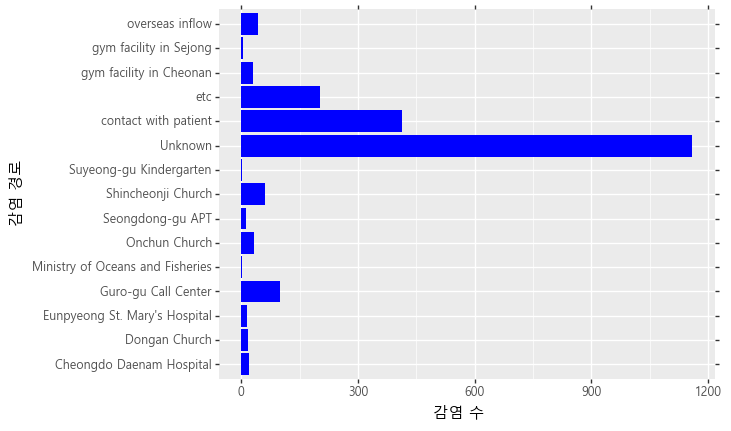

<ggplot: (176853293046)>

In [117]:
(ggplot(infection)
 +aes(x='감염 경로', y='감염 수')
 +geom_bar(stat='identity', position='dodge', fill='blue')
 +coord_flip()
 +theme(text=element_text(family='Malgun Gothic'))
)

In [118]:
# province별 city별로 환자 수 얼마나 나왔는지 그래프로 보기

case = pd.DataFrame(data.groupby(['province','city'])['patient_id'].count())

In [124]:
case = case.reset_index()
case

,index,province,city,patient_id
0,0,Busan,Buk-gu,3
1,1,Busan,Busanjin-gu,11
2,2,Busan,Dongnae-gu,29
3,3,Busan,Gangseo-gu,3
4,4,Busan,Geumjeong-gu,4
...,...,...,...,...
129,129,Ulsan,Buk-gu,5
130,130,Ulsan,Dong-gu,5
131,131,Ulsan,Jung-gu,3
132,132,Ulsan,Nam-gu,15
